Base de dados: <br>
* https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset
* https://medium.com/joguei-os-dados/nlp-e-mercado-melhores-t%C3%A9cnicas-e-a-constru%C3%A7%C3%A3o-de-modelos-eficientes-7cd8c6b380ce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lendo a base de dados
Base_Dados = pd.read_csv("reviews_data.csv")

In [4]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [5]:
# Veriicar
Base_Dados.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [6]:
Base_Dados['Rating'].unique()

array([ 5.,  1.,  2.,  3.,  4., nan])

# **Limpeza de colunas**

In [7]:
# Remover as colunas irrelevantes
Base_Dados.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [8]:
Base_Dados.drop(['name', 'location', 'Date', 'Image_Links'], axis=1, inplace=True)

In [9]:
Base_Dados.columns

Index(['Rating', 'Review'], dtype='object')

In [10]:
Base_Dados.shape

(850, 2)

In [11]:
Base_Dados.rename(columns ={"Rating":"class","Review":"text"}, inplace = True)

In [12]:
Base_Dados.columns

Index(['class', 'text'], dtype='object')

In [13]:
# Remover as linhas NaN da Base Dados
Base_Dados['class'].isnull().sum()

145

In [14]:
Base_Dados = Base_Dados.dropna()

In [15]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   705 non-null    float64
 1   text    705 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.5+ KB


## **Analise da Classificação**

In [16]:
Base_Dados['class'].value_counts()

class
1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

In [17]:
# Redução do número de labels em 'class'
def change_rating(x):
  if x > 3:
    return "Positive Rating"
  return "Negative Rating"

In [18]:
# ALtera na Base de Dados (Dataframe)
Base_Dados['class'] = Base_Dados['class'].apply(change_rating)

In [19]:
Base_Dados['class'].head(10)

0    Positive Rating
1    Positive Rating
2    Positive Rating
3    Positive Rating
4    Positive Rating
5    Negative Rating
6    Negative Rating
7    Negative Rating
8    Negative Rating
9    Negative Rating
Name: class, dtype: object

In [20]:
Base_Dados['class'].value_counts()

class
Negative Rating    583
Positive Rating    122
Name: count, dtype: int64

### **Nuvem de Palavras**

In [21]:
!pip install wordcloud

In [22]:
# Função para nuvem de cloud
from wordcloud import WordCloud

In [23]:
# Concatenar todas as palavras em uma única string
string = ''
for i in Base_Dados['text']:
  for word in i.split():
    string = string + ' ' + word

In [24]:
print(string)
#len(string)

 Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available. ** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so I’d love it. She took time out to talk to me for 2 minutes to make my experience better than what I’m used to. It was much appreciated! I’ve had bad experiences one after another at the Starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956 I just wanted to go out of my way to recognize a Starbucks employee Billy at the Franklin Park location! I was 

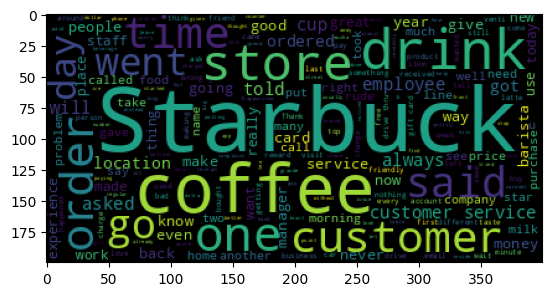

In [25]:
# Objeto WorCloud()
Nuvem_Palavras = WordCloud().generate(string)

Fig, eixo = plt.subplots()
eixo.imshow(Nuvem_Palavras)

In [26]:
Base_Dados['class'].unique()

array(['Positive Rating', 'Negative Rating'], dtype=object)

In [27]:
# Avaliação por review positivo e negativo

review_positive = ''
review_negative = ''

# Verifcar por cada classse (positivo e negativo)
for c in Base_Dados['class'].unique():
  # Positive
  if c == 'Positive Rating':
    Filtro = Base_Dados.loc[Base_Dados['class'] == c ]

    for i in Filtro['text']:
      for word in i.split():
        review_positive = review_positive + ' ' + word

  #Negative
  else:
    Filtro = Base_Dados.loc[Base_Dados['class'] == 'Negative Rating']
    for i in Filtro['text']:
      for word in i.split():
        review_negative = review_negative + ' ' + word

In [28]:
print(
    'Quantidade de Palavras: \n',
    f'Best_review: { len(review_positive) }',
    f'Worst_review: { len(review_negative) }'
)

Quantidade de Palavras: 
 Best_review: 40079 Worst_review: 304793


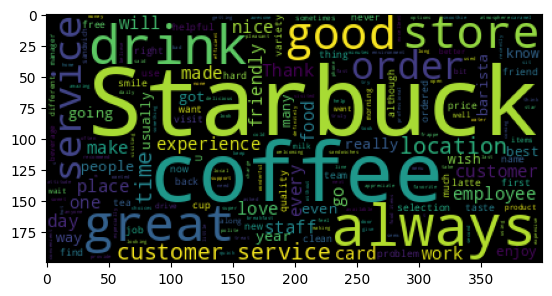

In [29]:
# Classe Positiva

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( ).generate( review_positive )

# Tamanho
Figura, Eixo = plt.subplots( )
# Plot
Eixo.imshow( Nuvem_Palavras )


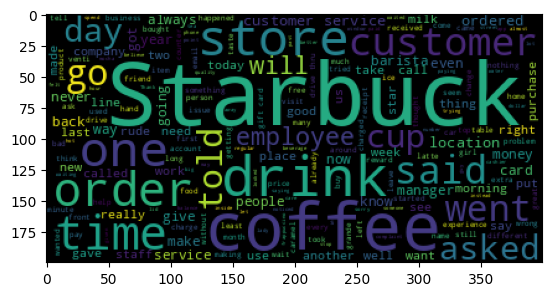

In [30]:
# Classe Negativo

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( ).generate( review_negative )

# Tamanho
Figura, Eixo = plt.subplots( )
# Plot
Eixo.imshow( Nuvem_Palavras )


# **Mineração de Texto**

In [31]:
#!pip install nltk

In [32]:
import re # REGEX
import nltk # NLP

## **Remoção duplicados**

In [33]:
Base_Dados.shape

(705, 2)

In [34]:
Base_Dados.drop_duplicates(['text'], inplace=True)

In [35]:
Base_Dados.shape

(704, 2)

## **Stops Words**

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/a10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
Base_Dados['text'][1]

'** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so I’d love it. She took time out to talk to me for 2 minutes to make my experience better than what I’m used to. It was much appreciated! I’ve had bad experiences one after another at the Starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956'

In [38]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## **Radical (stemming)**

In [39]:
# Fazer download
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/a10/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [40]:
radical = nltk.stem.RSLPStemmer()

In [41]:
frase = ['Gostei', 'Gostaram', 'Gostou', 'Gostam']
for i in frase:
  print(f'{i}: {radical.stem(i)}')

Gostei: gost
Gostaram: gost
Gostou: gost
Gostam: gost


## **REGEX**

In [42]:
frase = 'Aula de mineração ( #datamining ) de Dados com material disponível no moodle www.moodle.utfpr.edu.br'

In [43]:
re.findall('www\S+', frase)

['www.moodle.utfpr.edu.br']

In [44]:
re.findall('#\S+', frase)

['#datamining']

In [45]:
frase.lower()

'aula de mineração ( #datamining ) de dados com material disponível no moodle www.moodle.utfpr.edu.br'

# **Construção do Modelo**

In [46]:
Dados_Modelo = Base_Dados.copy()

In [47]:
Dados_Modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   704 non-null    object
 1   text    704 non-null    object
dtypes: object(2)
memory usage: 32.7+ KB


## **Limpeza dos dados**

In [48]:
def Limpeza_Dados( Texto ):

  # Remoção de links
  etapa_01 = re.sub('www\S+', '', Texto)

  # Transformar para minúsculo
  etapa_02 = etapa_01.lower()

  # Remoção de carcateres epeciais
  etapa_03 = re.sub(r'[!~@#$%^&*()+=|{}[\]:;<.>?/\'\\",-]', '', etapa_02)

  # Remoção de números
  etapa_04 = re.sub('[0-9]', '', etapa_03)

  return etapa_04

In [49]:
exemplo = Dados_Modelo['text'][10]
print(exemplo)
Limpeza_Dados(exemplo)

I filed a BBB complaint last month because Starbucks canceled my Starbucks Reward cards. I couldn't remember the balances, so I guessed about $9. Starbucks played nothing but games and tried everything they could to avoid responding to the complaint. I received a couple of phone call messages asking me to contact them directly and discuss the matter. The number provided was the customer service number and when I spoke with one representative, Linda hung up the phone on me. I did not use my card since 2012 which is my prerogative. Because of this and other reasons, Starbucks decided to close my Starbucks account. I reopened one about a few weeks ago and added a new card that I have not used yet.


'i filed a bbb complaint last month because starbucks canceled my starbucks reward cards i couldnt remember the balances so i guessed about  starbucks played nothing but games and tried everything they could to avoid responding to the complaint i received a couple of phone call messages asking me to contact them directly and discuss the matter the number provided was the customer service number and when i spoke with one representative linda hung up the phone on me i did not use my card since  which is my prerogative because of this and other reasons starbucks decided to close my starbucks account i reopened one about a few weeks ago and added a new card that i have not used yet'

In [50]:
# Limpeza em todas as amostras
Dados_Modelo['text'] = Dados_Modelo['text'].apply(Limpeza_Dados)

In [51]:
Dados_Modelo.head()

,class,text
0,Positive Rating,amber and ladonna at the starbucks on southwes...
1,Positive Rating,at the starbucks by the fire station on in a...
2,Positive Rating,i just wanted to go out of my way to recognize...
3,Positive Rating,me and my friend were at starbucks and my card...
4,Positive Rating,i’m on this kick of drinking cups of warm wat...


## **StopWords**

In [52]:
lista_stopwords = nltk.corpus.stopwords.words('english')
lista_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
def Remover_StopWords( Texto ):

  Lista_Palavras = Texto.split()

  # Texto sem as stopwords
  nova_frase = ''

  for word in Lista_Palavras:
    if word not in lista_stopwords:
      nova_frase = nova_frase + ' ' + word

  return nova_frase

In [54]:
exemplo = Dados_Modelo['text'][10]
print(len(exemplo))
saida = Remover_StopWords(exemplo)
print(len(saida))

685
469


In [55]:
Dados_Modelo['text'] = Dados_Modelo['text'].apply(Remover_StopWords)

## **Extração do Radical**

In [56]:
Stem = nltk.stem.RSLPStemmer()

In [57]:
def Extrair_Radical( Texto ):

  Lista_Palavras = Texto.split()
  nova_frase = ''

  for word in Lista_Palavras:
    radical = Stem.stem(word)
    nova_frase = nova_frase + ' ' + radical
  return nova_frase

In [58]:
exemplo = Dados_Modelo['text'][10]
print(exemplo)
Extrair_Radical(exemplo)

 filed bbb complaint last month starbucks canceled starbucks reward cards couldnt remember balances guessed starbucks played nothing games tried everything could avoid responding complaint received couple phone call messages asking contact directly discuss matter number provided customer service number spoke one representative linda hung phone use card since prerogative reasons starbucks decided close starbucks account reopened one weeks ago added new card used yet


' filed bbb complaint last month starbuck canceled starbuck reward card couldnt rememb balanc guessed starbuck played nothing gam tried everything could avoid responding complaint received coupl phon call messag asking contact directly discus matt numb provided custom serv numb spok one representativ lind hung phon use card sinc prerogativ reasom starbuck decided clos starbuck account reopened one week ago added new card used yet'

In [59]:
Dados_Modelo['text'] = Dados_Modelo['text'].apply(Extrair_Radical)

## **Tokenização**

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/a10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
from nltk.tokenize import word_tokenize

In [62]:
exemplo = Dados_Modelo['text'][10]
pd.DataFrame(word_tokenize (exemplo)).transpose()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,filed,bbb,complaint,last,month,starbuck,canceled,starbuck,reward,card,...,account,reopened,one,week,ago,added,new,card,used,yet


## **Modelo**

In [63]:
from sklearn.feature_extraction.text import  CountVectorizer

In [64]:
# Separar entre previsores e classe
X = Dados_Modelo['text']
y = Dados_Modelo['class']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [67]:
X_train.shape

(492,)

In [68]:
X_test.shape

(212,)

In [69]:
# Aplicar a trasnformação com CountVectorizer()
vect = CountVectorizer()

vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [70]:
X_train_vect.shape

(492, 3886)

In [71]:
X_test_vect.shape

(212, 3886)

In [72]:
vect.get_feature_names_out()

array(['aa', 'abay', 'abaz', ..., 'zeeb', 'zer', 'zitfaced'], dtype=object)

In [73]:
# Normalizar por TF-idf
from sklearn.feature_extraction.text import TfidfTransformer

In [74]:
Tfidf = TfidfTransformer()
X_train_vect = Tfidf.fit_transform(X_train_vect)
X_test_vect = Tfidf.fit_transform(X_test_vect)

In [75]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Instanciando o modelo
CLF = KNeighborsClassifier()

# Treinamento
CLF.fit(X_train_vect, y_train)
y_pred = CLF.predict(X_test_vect)

## **Avaliação do Modelo**

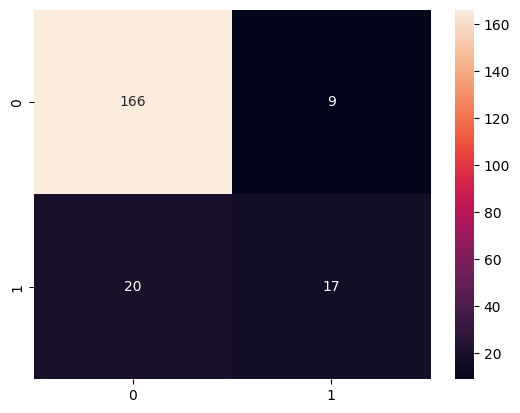

In [76]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Definindo as classes
Classes = ['Negative', 'Positive']

# Plot
Matriz_Confusao = confusion_matrix( y_test, y_pred )
# sns.heatmap( Matriz_Confusao, annot=True, cbar=False, fmt='d', yticklabels=Classes, xticklabels=Classes );
sns.heatmap( Matriz_Confusao, annot=True, fmt ='d');

In [77]:
# Relatorio de classificação
from sklearn.metrics import classification_report

# Avaliacao
Avaliacao = classification_report( y_test, y_pred )
print( Avaliacao )

                 precision    recall  f1-score   support

Negative Rating       0.89      0.95      0.92       175
Positive Rating       0.65      0.46      0.54        37

       accuracy                           0.86       212
      macro avg       0.77      0.70      0.73       212
   weighted avg       0.85      0.86      0.85       212

